<a href="https://colab.research.google.com/github/hamidameer/Face-Blurring-for-Privacy-Protection/blob/main/Face_Blurring_for_Privacy_Protection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Face Detector

In [ ]:
import cv2
from icrawler.builtin import BingImageCrawler
import cv2
import matplotlib.pyplot as plt
import os
import shutil

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

### Image Preprocessing

In [ ]:
def preprocess_image(img):
    image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    image = cv2.equalizeHist(image)
    image = cv2.GaussianBlur(image, (5, 5), 0)
    return image

### Face Detection

In [ ]:
def detect_faces(img):
    faces = face_cascade.detectMultiScale(img, scaleFactor=1.1, minNeighbors=5)
    return faces

### Face Blurring

In [ ]:
def blur_faces(img, faces):
    for (x, y, w, h) in faces:
        face_region = img[y:y+h, x:x+w]
        blurred_face = cv2.GaussianBlur(face_region, (99, 99), 30)
        img[y:y+h, x:x+w] = blurred_face
    return img

###Face Blurring for Privacy Protection

In [ ]:
from google.colab.patches import cv2_imshow
def main(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print("Could not load image.")
        return

    # display processed image
    gray = preprocess_image(img)
    print("processed Image:")
    resized_img = cv2.resize(gray, (300, 400))
    cv2_imshow(resized_img)

    # display dtected faces
    faces = detect_faces(gray)
    for (x, y, w, h) in faces:
      print("Extracted face Image:")
      face = gray[y:y+h, x:x+w]
      resized_img = cv2.resize(face, (300, 400))
      cv2_imshow(resized_img)


    # display blurred faces
    result = blur_faces(img, faces)
    print("Blurred Image:")
    resized_img = cv2.resize(result, (300, 400))
    cv2_imshow(resized_img)


In [ ]:
!pip install icrawler


###Search for an Image to Download

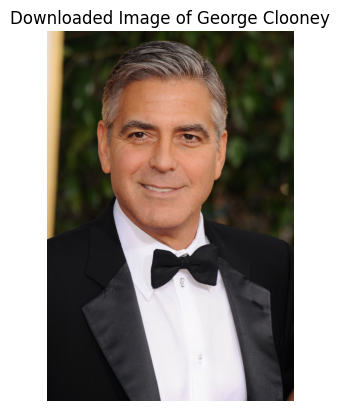

In [ ]:
from icrawler.builtin import BingImageCrawler
import cv2
import matplotlib.pyplot as plt
import os
import shutil

# Change this keyword to download images of a different person
person_name = 'George Clooney'

image_folder = 'person_images'

# Remove the folder and its contents if it exists (clean old images)
if os.path.exists(image_folder):
    shutil.rmtree(image_folder)

# Create a new empty folder
os.makedirs(image_folder)

crawler = BingImageCrawler(storage={'root_dir': image_folder})
crawler.crawl(keyword=person_name, max_num=1)

# Load and show downloaded image
image_files = os.listdir(image_folder)
image_path = os.path.join(image_folder, image_files[0])

image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis('off')
plt.title(f"Downloaded Image of {person_name}")
plt.show()


###Output

processed Image:


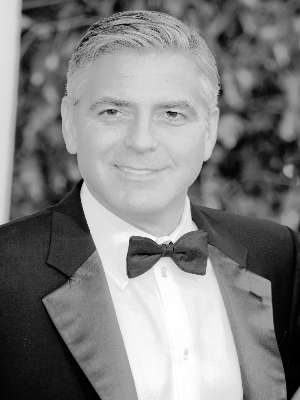

Extracted face Image:


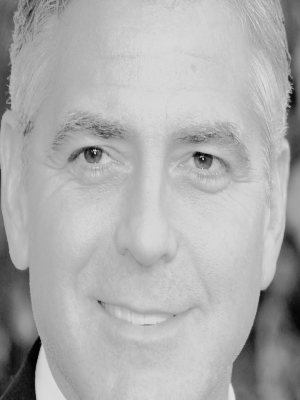

Blurred Image:


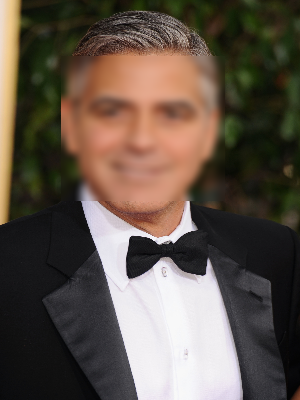

In [ ]:
main(image_path)